In [1]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import acquire as a
import os
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
df = a.wrangle_wine()
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
df.shape

(6497, 13)

In [4]:
train, val, test = a.split_data(df)
train.shape, val.shape, test.shape

((3637, 13), (1560, 13), (1300, 13))

In [5]:
def pearson_r(x, y):
    
    r, p = stats.pearsonr(x, y)
    print(f'r = {r:.5f}')
    print(f'p = {p:.1f}')


In [6]:
pearson_r(df.alcohol, df.quality)

r = 0.44432
p = 0.0


In [7]:
def spearman_r(x, y):
    
    cor, p = stats.spearmanr(x, y)
    print(f'cor = {cor:.5f}')
    print(f'p = {p:.1f}')

    a = .5

    if p < a:
        print(f"There is a statistically significant Spearman's rank correlation (p-value = {p:.4f}, corr = {cor:.4f}).")
    else:
        print(f"There is no statistically significant Spearman's rank correlation (p-value = {p:.4f}, corr = {cor:.4f}).")

In [8]:
spearman_r(df.alcohol, df.quality)

cor = 0.44693
p = 0.0
There is a statistically significant Spearman's rank correlation (p-value = 0.0000, corr = 0.4469).


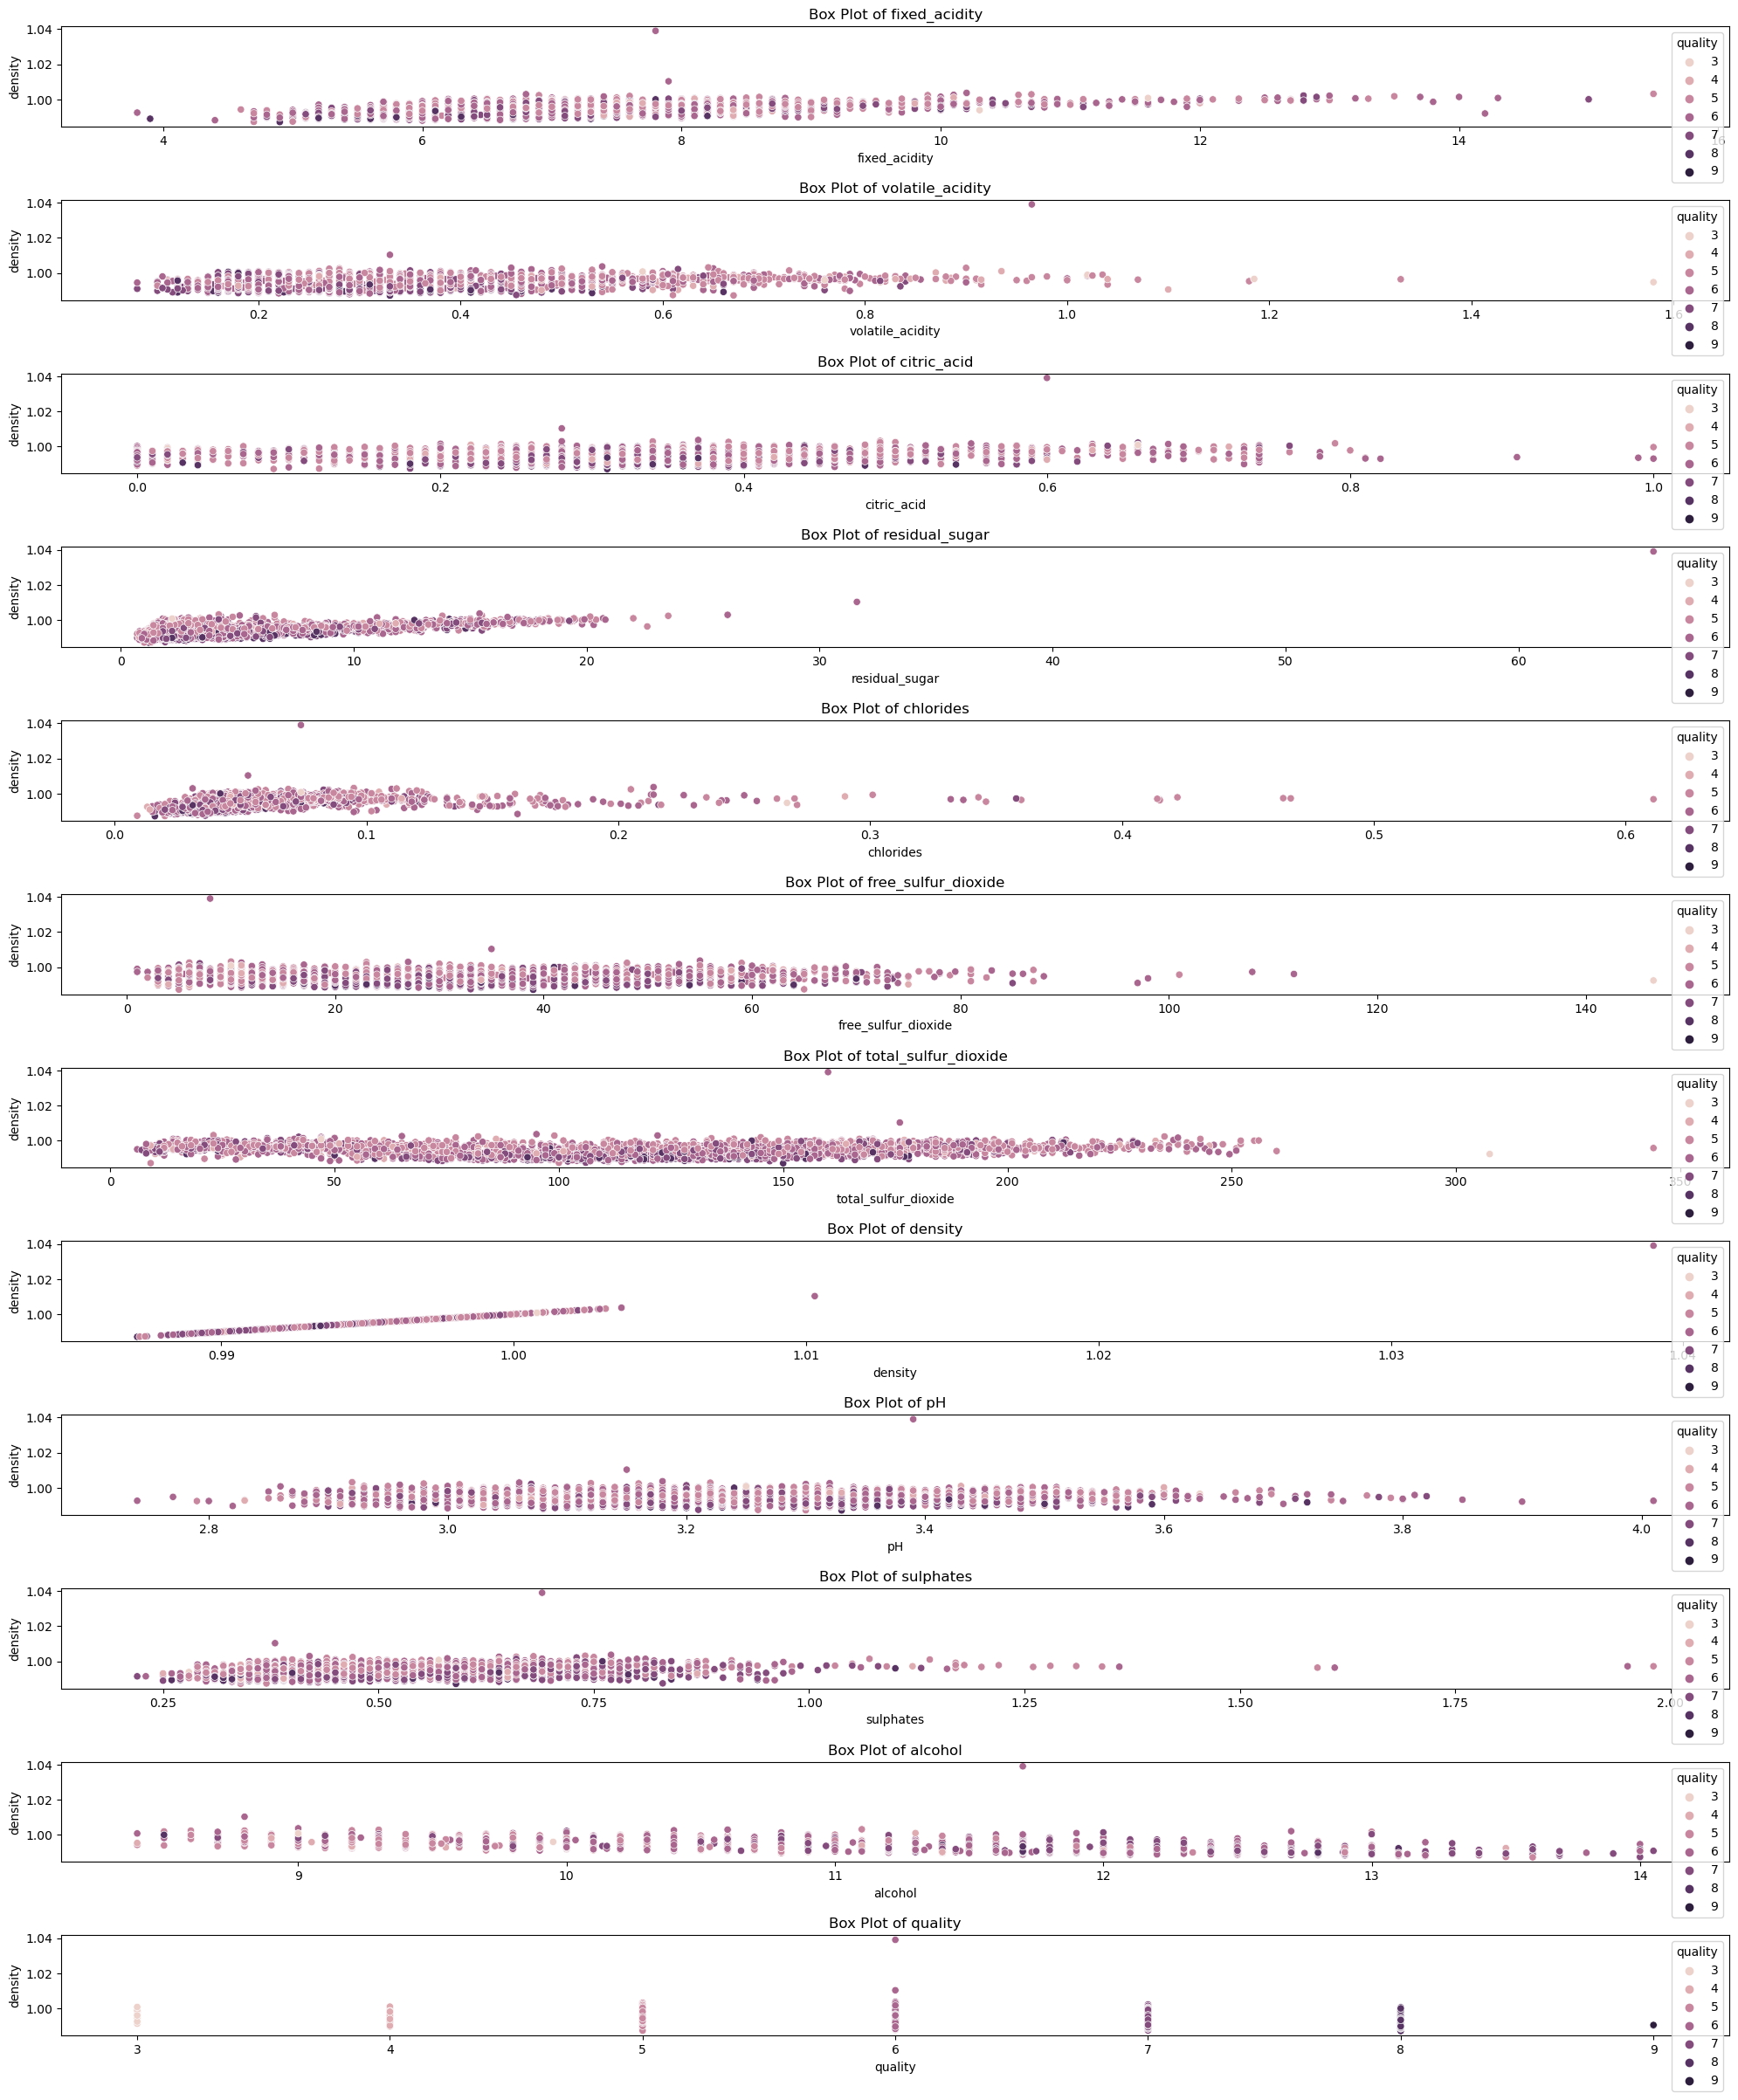

In [9]:
# Assuming your DataFrame is named 'df'
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Set the figure size
plt.figure(figsize=(20, 24))  # Adjust the figure size as needed

# Create a single column of box plots for each numerical column
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(len(numerical_columns.columns), 1, i + 1)
    sns.scatterplot(x=column,y='density', data=train, hue = 'quality')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

In [20]:
# Define custom labels for "quality"
bins_q = [3, 5, 6, 9]
labels_q = ['Low', 'Med', 'High']

# Create a new column "quality_bins" to store the bin labels
train['quality_bins'] = pd.cut(df['quality'], bins=bins_q, labels=labels_q)

<Axes: xlabel='alcohol', ylabel='sulphates'>

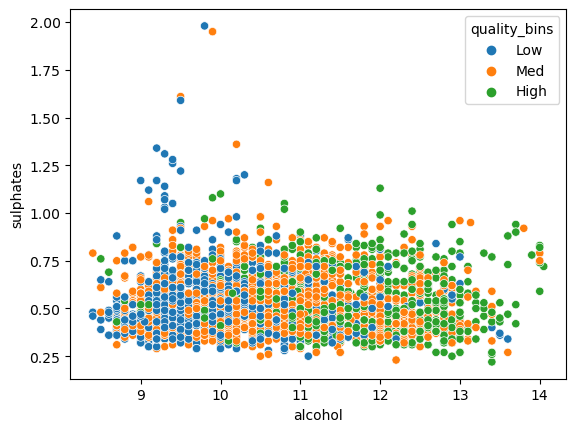

In [29]:
sns.scatterplot(data= train, x='alcohol', y= 'sulphates', hue = 'quality_bins')